In [1]:
import rasterio
import matplotlib.pyplot as plt

In [5]:
from lightning.pytorch import Trainer
from torch.utils.data import DataLoader

# from torchgeo.datamodules import InriaAerialImageLabelingDataModule
from torchgeo.datasets import CDL, Landsat7, Landsat8, Landsat9, VHR10, stack_samples, Sentinel
from torchgeo.samplers import RandomGeoSampler
# from torchgeo.trainers import SemanticSegmentationTask

In [41]:
import xarray as xr
import numpy as np

### Importing LandSAT8 data - Downloaded from the USGS website

In [7]:
# landsat7 = Landsat7(root="", bands=["B1", ..., "B7"])
# iowa = Landsat8(root="..\\Data\\Remote Sensing\\LandSat\\Iowa", bands=["B1", "B2", "B3", "B4", "B5", "B6", "B7"])
kansas = Landsat9(root="..\\Data\\Remote Sensing\\LandSat\\Kansas_Jan", bands=["B1", "B2", "B3", "B4", "B5", "B6", "B7"])

In [8]:
cdl = CDL(root="..\\Data\\Remote Sensing\\CDL22")

In [17]:
dataset = cdl & kansas

Converting Landsat9 CRS from EPSG:32614 to EPSG:5070


In [23]:
sampler = RandomGeoSampler(dataset, size=256, length=1000)

In [24]:
sample = next(iter(sampler))
datapoint = dataset[sample]

In [28]:
datapoint.keys()

dict_keys(['crs', 'bbox', 'mask', 'image'])

In [29]:
mask = datapoint["mask"].numpy().transpose(1, 2, 0)

In [33]:
img_7bands = datapoint["image"].numpy().transpose(1, 2, 0)
img_rgb = img_7bands[:, :, [3, 2, 1]]
img_rgb = (img_rgb - img_rgb.min()) / (img_rgb.max() - img_rgb.min())


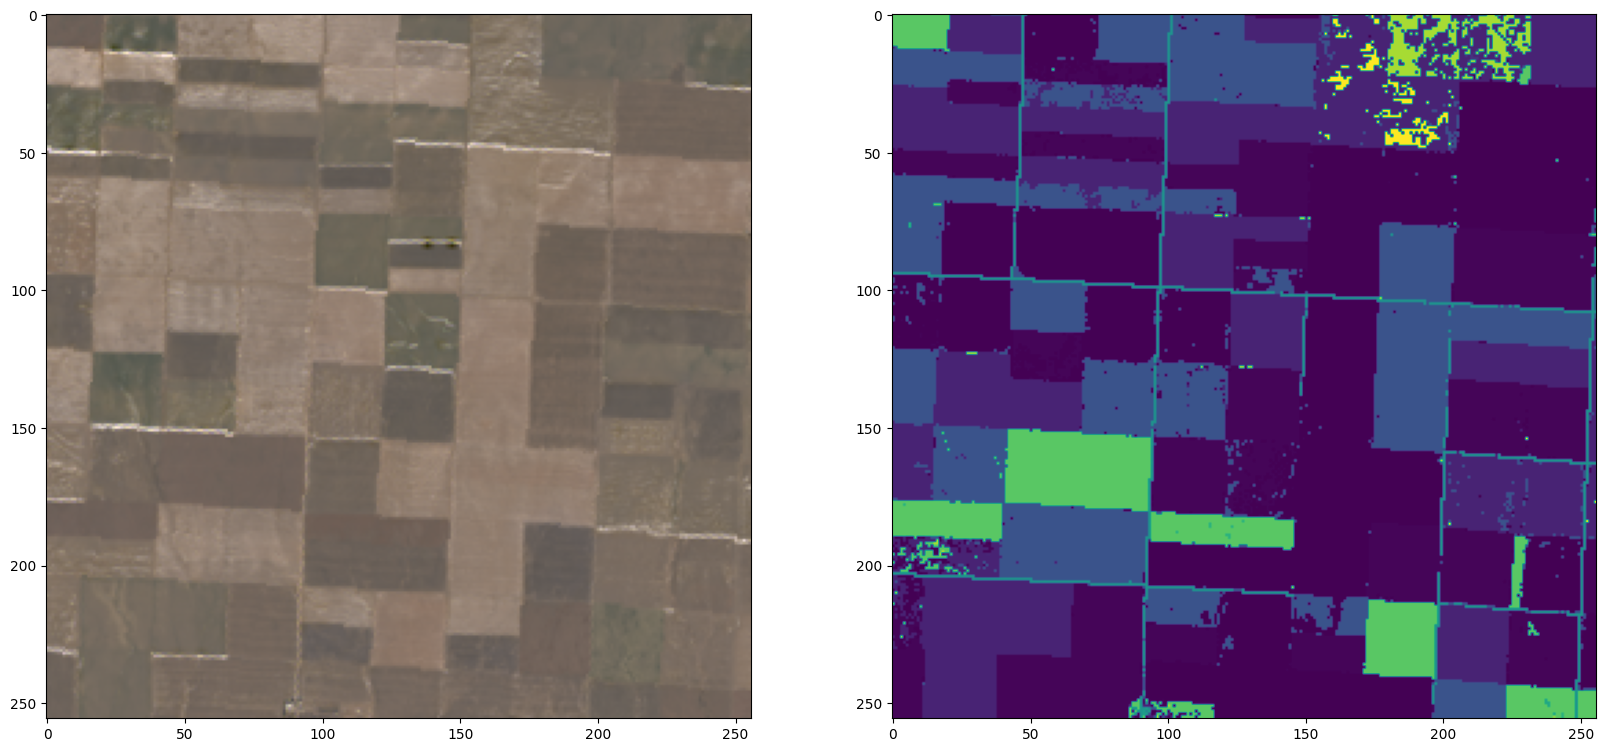

In [40]:
#show mask and image side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img_rgb)
ax[1].imshow(mask)
plt.show()
    

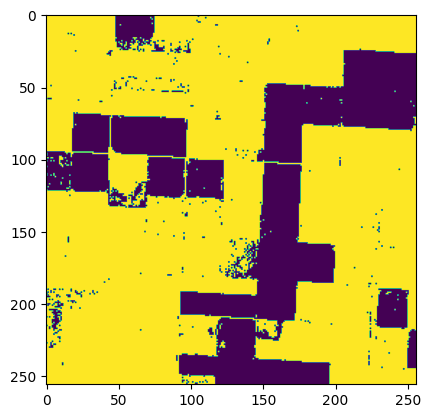

In [43]:
# mask is a numpy array of shape (256, 256, 1), make everything other than 1, white
mask[mask != 1] = 255

plt.imshow(mask)